In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import binom, norm
import os
import seaborn as sns
import random

%matplotlib inline

# Set a seed value
seed_value= 42 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value

random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value

np.random.seed(seed_value)

Imagine I asked you to tell the proportion of water on earth. Incase you already know it, pretend you just forgot it ( nor can you search online or ask your friend). But, you found a toy globe model of the earth. With your faith in fellow humans, you decide to use it to determine the true proprotion of water. 

Here's the idea. You will toss the globe and catch it for `n` times. And you note how many times it landed on `Water`. Let's denote it by `y`. Let the true parameter be `θ`, which we seek to estimate. Supposed you tossed for `n = 10` times and you landed on water `y = 7` times.  More precisely here's the data [0,0,0,1,1,1,1,1,1,1], where `1`:water,`0`:land.

Before proceeding, let's see bayes rule once again as it might come handy,

## Bayes Rule



Bayes rule is often used to compute a distribution over possible values of a **hidden variable** or **hypothesis** $h \in \cal{H}$ after observing some evidence $Y=y$. We can write this as follows:


$$
\begin{align}
p(H=h|Y=y) &= \frac{p(H=h) p(Y=y|H=h)}{p(Y=y)} \\
\text{posterior}(h|y) &= \frac{\text{prior}(h) * \text{likelihood}(y|h)}{\text{marginal-likelihood}(y)}
 \end{align}
 $$ 

In our case,


\begin{equation}
\text{P}(θ|y) = \frac{\text{P}(y|\theta) \times \text{P}(θ)}{\text{P}(y)}
\end{equation}


## Approach

Let's start thinking about what we can do ? We are told that we do not know anything about the true proportion of water. But, is it the case ?

- we know `θ` ∈ [0,1]

- If we knew true `θ` the model for predicting `y` could be `binomial`

\begin{equation}
P(y | θ,n) = \binom{n}{y} θ^y (1-θ)^{n-y}
\end{equation}





### Question 2

a. How likely it is to see water 7 times out of 10 tosses(as we happened to note in our experiment) , if the true θ were `0.1`,`0.5`,`0.9` respectively ? [10 points]




Answer: when the true θ were `0.1`, the answer is `8.748 * 10^-6`.
when the true θ were `0.5`, the answer is `0.1172`
when the true θ were `0.9`, the answer is `0.0574`.

Since our data have unique sequence of [0,0,0,1,1,1,1,1,1,1], therefore we should divide each answer with (10 choose 3) which is 120

b. Now if you were to choose a single value out of the above 3 for the true  θ , which one would you choose and why ? [10 points]


Answer:


I would choose `0.5`, because it has the highest probability out of those 3 value. That means this value is more likely to let us toss water 7 times out of 10 tosses

c. Fill the missing lines in the below code snippet and give the theta that gives highest likelihood for the data. [10 points]

In [ ]:
# But why to check only those three theta's, we can check all theta's

possible_thetas = np.linspace(0,1,100)

#evaluate the likelihood values of `possible_thetas`
possible_likelihoods = (possible_thetas**7 * ((1-possible_thetas)**3))*120

# what's the value of theta with maximum value of likelihood.
max_lik_est_theta = possible_thetas[np.argmax(possible_likelihoods)]
print(max_lik_est_theta)

0.696969696969697


d. Now we can declare that our true theta is equal to our `max_lik_est_theta`. But is it so ? What if you borrowed the globe from your friend and he let's you toss it only once and you got `land`.(also true in our experiment where the first toss was `0`/`land`.) What's your estimate for the true proportion of water based on MLE estimator for this data ? Do you think your estimate is reasonable in this case ? [10 points]

Answer: Then my estimate proportion of water 0%, because right after one toss, MLE is only estimate based on this one data. I think it is not reasonable since MLE is estimating the proportion after I only toss once, which means there is not enough data. Therefore, even if there are proportion of water, based on the data, the MLE will still estimate 0% water. When the data is so little, MLE estimator could mistake you.

It turns out that we can use bayes rule to get the complete posterior. Consider the outcome of our first experment ([0,0,0,1,1,1,1,1,1,1], where `1`:water,`0`:land.). For a fixed prior Beta(2,2), below plot generates the posterior after seeing each observation and calculates the corresponding `MAP` estimate. 

In [ ]:

def plot_beta_prior(alpha,beta):
  

  a = alpha
  b = beta
  x = np.linspace(0,1,100)
  plt.plot(x, stats.beta.pdf(x, a, b))
  plt.xlabel('x')
  plt.ylabel('pdf(x)')
  plt.title(f'Prior Beta({a,b}) Distribution')
  plt.show()



def plot_beta_posterior_ondata(alpha,beta,y_obs):

  

  #since our prior is beta(2,2), our posterior will have a close form solution, beta(alpha+y,beta-y+1). Refer Extra's for the proof.
  cur_water_cnt = 0
  #let's take 1000 values for our posterior theta to evaluate our posterior
  pos_theta_x = np.linspace(0, 1, 1000)


  cur_alpha = alpha
  cur_beta = beta
  fig, ax_arr = plt.subplots(ncols=5,nrows=2 ,figsize=(32,8), sharex=True)
  for i,obs in enumerate(y_obs):
    if i<5:
      ax = ax_arr[0,i]
    else:
      ax = ax_arr[1,i-5]
    cur_alpha += obs
    cur_beta = (cur_beta-obs+1)
    #evaluates the pdf of the posterior
    pos_theta_y = sp.stats.beta.pdf(x=pos_theta_x, a=cur_alpha, b=cur_beta)
    ax.plot(pos_theta_x, pos_theta_y, linewidth=3)
    #it turns out that the MAP for beta distribution also has a closed form solution but we can just look at the max directly.
    mode = pos_theta_x[np.argmax(pos_theta_y)]
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title(f"After {i}th sample:{obs},MAP={round(mode,3)}")
  fig.tight_layout()




    





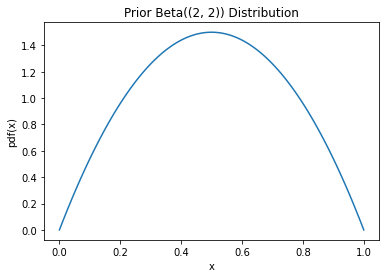

In [ ]:
plot_beta_prior(2,2)

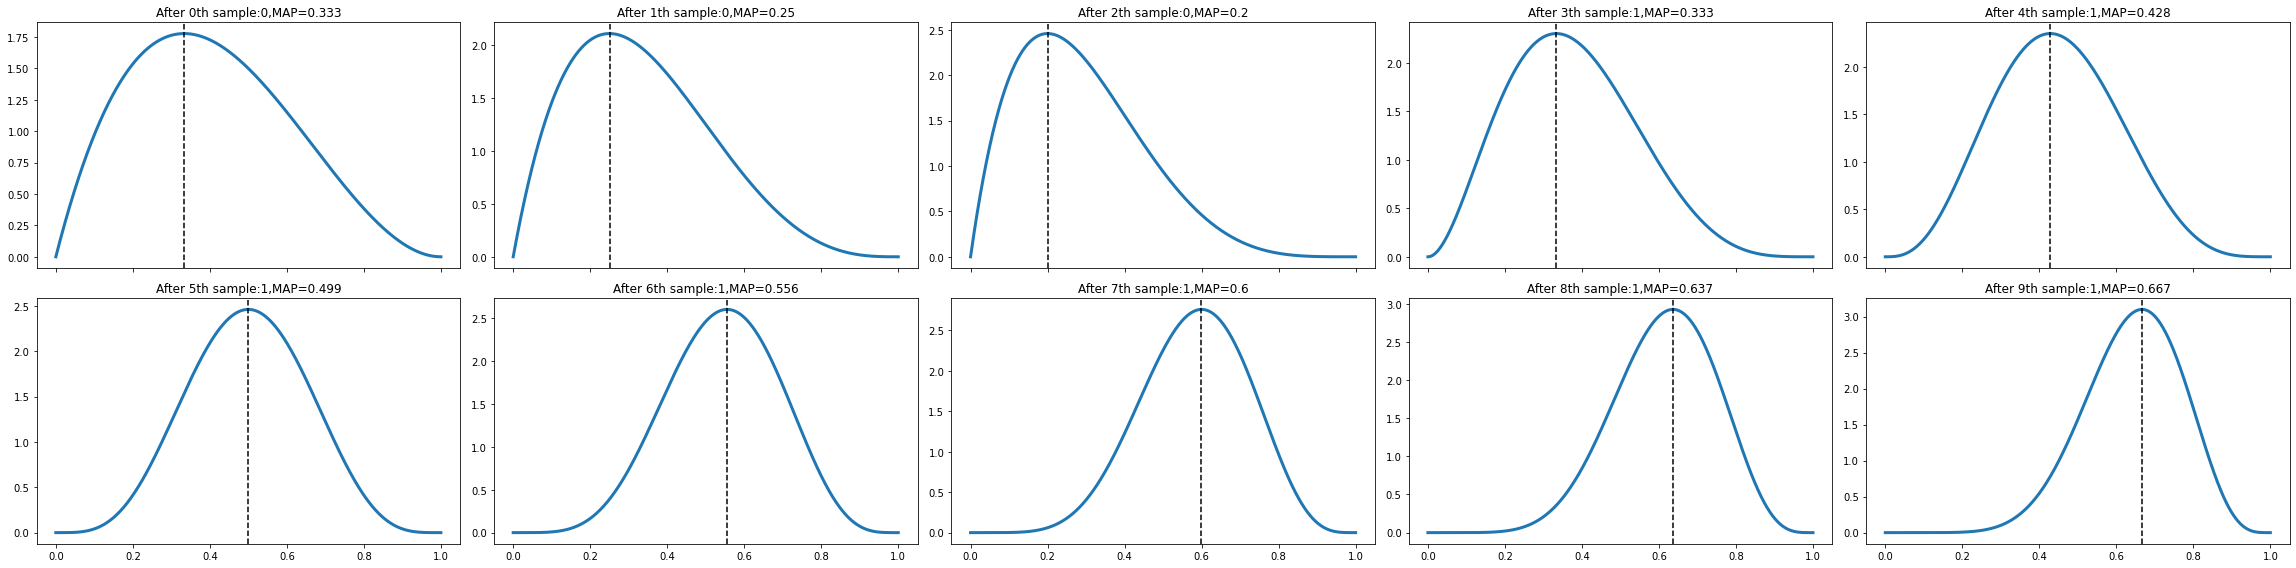

In [ ]:
alpha = beta = 2
y_obs = [0,0,0,1,1,1,1,1,1,1]

plot_beta_posterior_ondata(alpha,beta,y_obs)

e. Analyze the above plots and give a one line justification of how `MAP` estimates addressed the problem that we encountered earlier with `MLE`(i.e when we observed only one data point `0`) ? [10 points]

Answer: Since MLE will maximize the likelihood, based on the posterior(observation), which is argmax `P(D|0)`. In this case, when there is not enought data, the likelihood of data can be wrong. However, MAP is going to use the prior probability times MLE `P(0)P(D|0)` to maximize the posterior probability. With is prior probability, our output will not completly based on the observation, so that we can see what posterior should be look like based on what we assume.

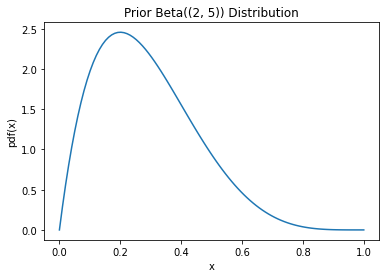

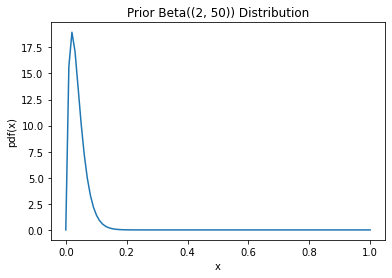

In [ ]:
# effect of prior on posterior and MAP.
# understandig beta distributions, what happens if we increase beta

plot_beta_prior(2,5)
plot_beta_prior(2,50)

Now let's cheat a little bit. We know that true proportion of water is about 0.71. Let's generate 1000 samples from a bernouli distribution with p= 0.71 and see how our `MAP` estimates differ from `MLE`.

In [ ]:
#n = 10
true_theta = 0.71
y_obs = np.random.choice([0, 1], p=[1-true_theta, true_theta], size=1000)

# This is an updated function that we used earlier
def plot_beta_posterior_ondata(alpha,beta,y_obs):

  

  #since our prior is beta(2,2), our posterior will have a close form solution, beta(alpha+y,beta-y+1). Refer Extra's for the proof.
  cur_water_cnt = 0
  #let's take 1000 values for our posterior theta to evaluate our posterior
  pos_theta_x = np.linspace(0, 1, 1000)


  cur_alpha = alpha
  cur_beta = beta
  fig, ax_arr = plt.subplots(ncols=5,nrows=2 ,figsize=(32,8), sharex=True)
  for i,ind in enumerate(np.linspace(0,999,10)):
    ind = int(ind)
    
    
    obs = y_obs[ind]
    if i<5:
      ax = ax_arr[0,i]
    else:
      ax = ax_arr[1,i-5]

    cur_alpha = cur_alpha + sum(y_obs[:ind+1])
    cur_beta = cur_beta + (ind - sum(y_obs[:ind+1]))
    
    pos_theta_y = sp.stats.beta.pdf(x=pos_theta_x, a=cur_alpha, b=cur_beta)
  
    ax.plot(pos_theta_x, pos_theta_y, linewidth=3)
    #it turns out that the MAP for beta distribution also has a closed form solution but we can just look at the max directly.
    mode = pos_theta_x[np.argmax(pos_theta_y)]
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title(f"After {ind+1}th sample:{obs},MAP={round(mode,3)},MLE:{round(np.mean(y_obs[:ind+1]),2)}")
  fig.tight_layout()




    





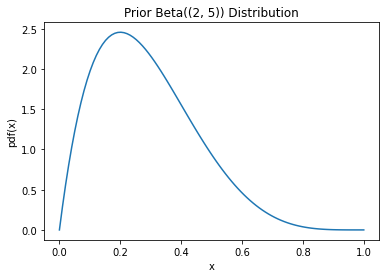

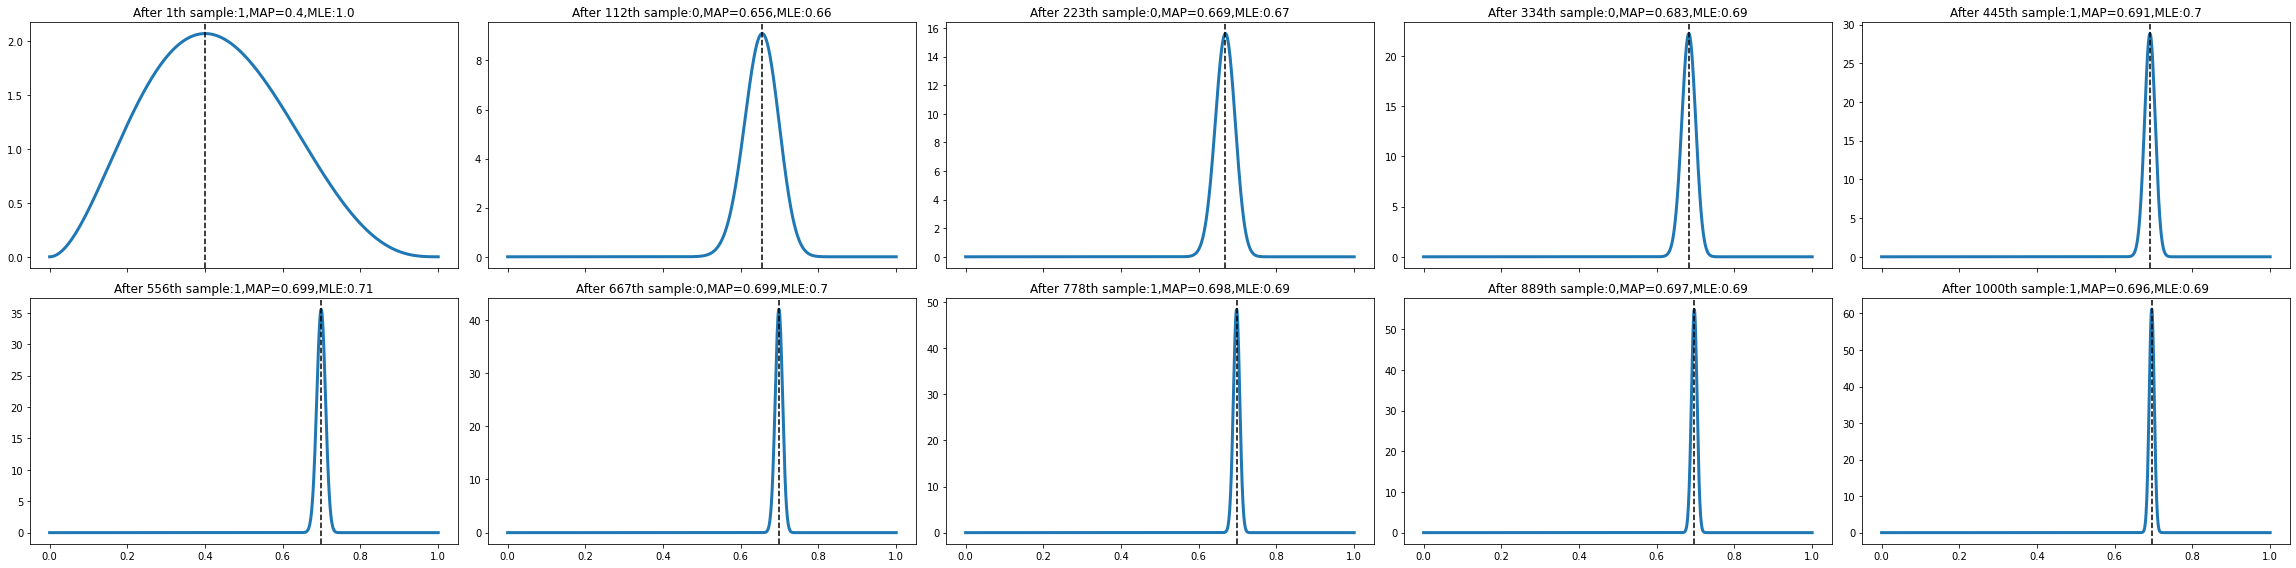

In [ ]:
plot_beta_prior(2,5)
plot_beta_posterior_ondata(2,5,y_obs)

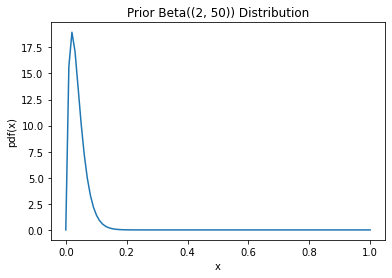

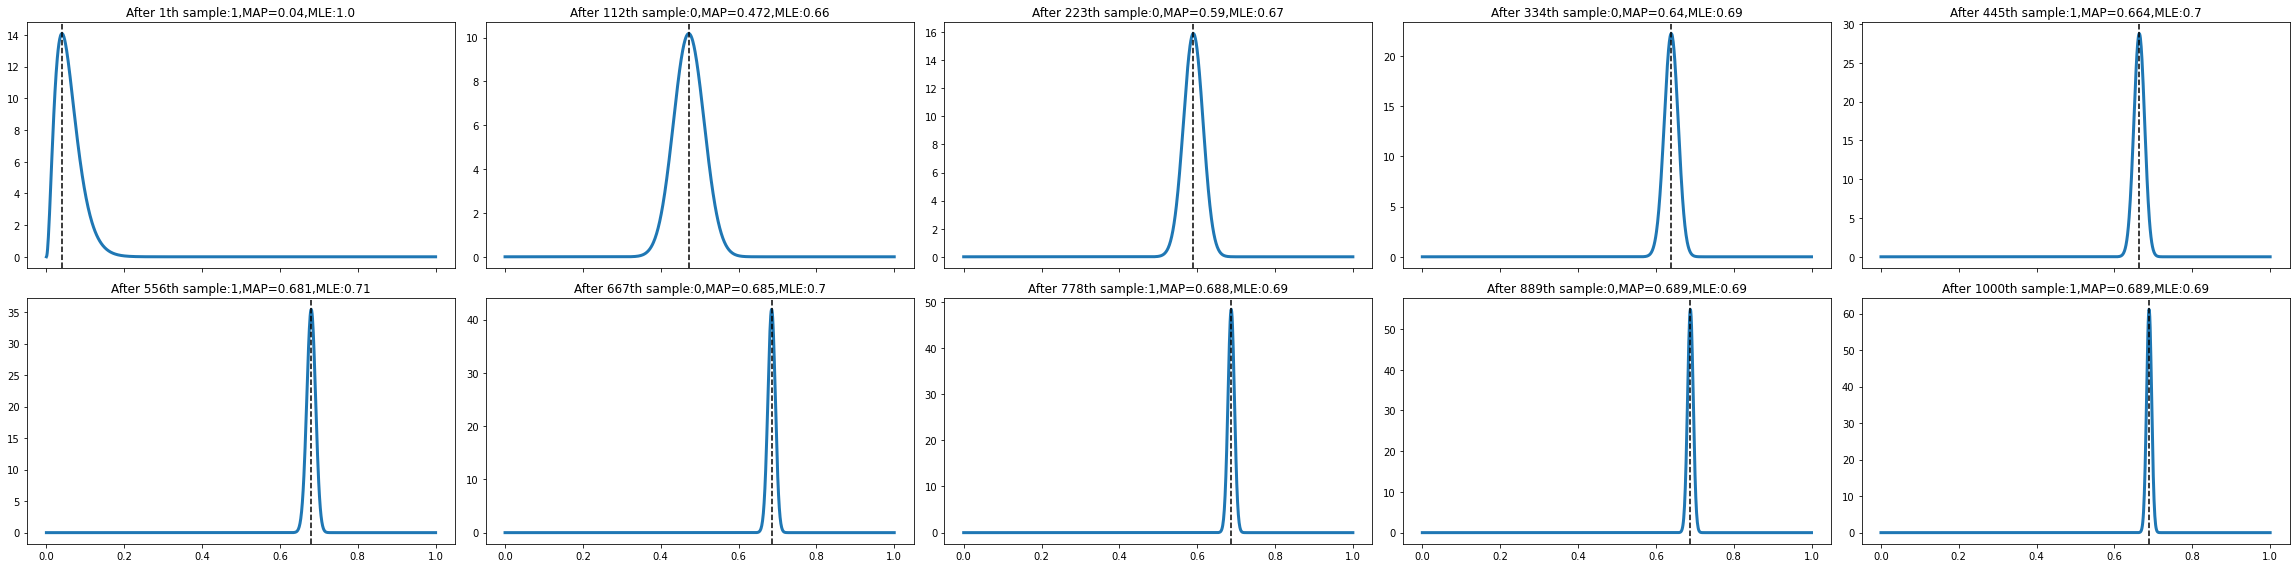

In [ ]:
plot_beta_prior(2,50)
plot_beta_posterior_ondata(2,50,y_obs)

f. In real life we don't know true θ but only observe data. 
But, Since you know the true proportion in this case which one of the above priors do you think is worse ? What's the impact of choosing such worse prior is n increases ? Suppose you know your θ to be close to zero, which prior would be a good choice ? [10 points]

Answer: If we know the true proportion, then Beta(2,50) would be worse. Because when number inside of beta is larger, then that means we are tend to believe our assumption. However, when we know the true proportion, our believe becomes not important. Therefore, if we still use a large number in beta to show what we believe when there is a true proportion, then the output will have large error.


However, as the n increase, our data became larger and larger, then the prior become less important, because the data will tell us a lot of information about the θ, and data will dominate the estimator.


If our θ close to zero, then beta(2,50) would be a good choice. Because as our 0 close to zero, that means we have no idea what the output should look like. When we have a big value in beta, that means we are putting our assumption into account. In this case, when we choose beta(2,50), our estimator will tell us more information about the model.


g. We noted that using beta-prior enables in a closed form solution for posterior. Now Let's chose a normal prior with mean = 0.5, var = 1. Complete the below code that computes the posterior after seeing all our data.  Does the MLE estimate change when we move from beta to normal ? What's the new MAP for θ ? [10 points]

Answer:
The MLE estimate will not change, because we know that MLE maximize likelihood based on the observation(posterior), not based on the prior. Therefore, when we move prior from beta to normal, it will not change MLE estimate. Based on the output below, our new MAP is 0.686868686868687

In [ ]:
y_obs

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

The MAP estimate : 0.686868686868687


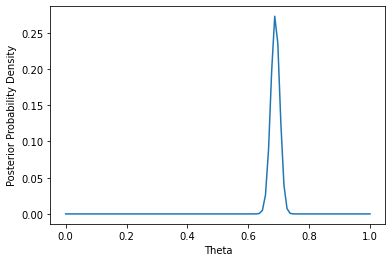

In [ ]:
import math


data = y_obs

# Compute posterior distribution of theta
prior = norm(0, 1)
theta_values = np.linspace(0, 1, 100)

sigma = 1
mu = 0.5

#complete this line, hint: use bayes rule
# data = norm.pdf(data, 0.5, 1)
# calculate the number of 1 and 0 in data
# alpha = data.count(1)
unique, counts = np.unique(data, return_counts=True)
dic = dict(zip(unique, counts))
one = dic.get(1)
zero = dic.get(0)
posterior_unnorm = np.zeros(100)
choose = math.comb(1000, one)
for i in range(100):
  # posterior_unnorm = np.array(((np.power(theta_values[i], data) * np.power((1-theta_values[i]), 1-data))) * prior.pdf(theta_values[i]))
  # posterior_unnorm = np.array((np.sum(np.log(2*np.pi*(sigma**2))/2 + ((data[i]-mu)**2)/(2 * (sigma**2)))) * prior.pdf(theta_values[i]))
  # posterior_unnorm = np.array(((np.power(theta_values[i], one) * np.power((1-theta_values[i]), zero))) * prior.pdf(theta_values[i]))
  posterior_unnorm[i] = ((np.power(theta_values[i], one) * np.power((1-theta_values[i]), zero))) * prior.pdf(theta_values[i]) * choose
posterior =  posterior_unnorm/sum(posterior_unnorm)
# print(dic)
# print(one)
# print(choose)

print(f"The MAP estimate : {theta_values[np.argmax(posterior)]}")

# Plot posterior distribution
plt.plot(theta_values, posterior)
plt.xlabel('Theta')
plt.ylabel('Posterior Probability Density')
plt.show()

# data = y_obs

# # Compute posterior distribution of theta
# prior = norm(0, 1)
# theta_values = np.linspace(0, 1, 100)

# #complete this line, hint: use bayes rule
# n = len(data)
# sigma = 1
# mu = 0.5
# posterior_unnorm = np.zeros(100)
# # ll = n/2.0 * np.log(2 * np.pi) + n/2.0 * np.log(sigma **2 ) + 1/(2*sigma**2) * sum([(x_ - mu)**2 for x_ in data ])
# ll = np.power((1/sigma*(np.sqrt(2*np.pi))), n) * np.power(np.e, (-(sum([(x_ - mu)**2 for x_ in data]))/(2*sigma**2)))
# # np.e(-(sum([(x_ - mu)**2 for x_ in data]))/(2*sigma**2))
# for i in range(100):
#   # posterior_unnorm[i] = ll * np.log(prior.pdf(theta_values[i]))
#   posterior_unnorm[i] = ll * prior.pdf(theta_values[i])
# posterior = posterior_unnorm/sum(posterior_unnorm)

# print(f"The MAP estimate : {theta_values[np.argmax(posterior)]}")

# # Plot posterior distribution
# plt.plot(theta_values, posterior)
# plt.xlabel('Theta')
# plt.ylabel('Posterior Probability Density')
# plt.show()

## Useful Material(Extra)

### MLE

The likelihood function for a binomial model with parameters $p$ and $n$ is given by:

\begin{equation}
L(p; x) = \binom{n}{x} p^x (1-p)^{n-x}
\end{equation}

where $x$ is the number of successful trials and $n$ is the total number of trials.

To find the MLE, we take the derivative of the likelihood function with respect to $p$ and set it equal to zero:

\begin{align}
\frac{d}{dp} L(p; x) &= \frac{d}{dp} \binom{n}{x} p^x (1-p)^{n-x} \\
&= \binom{n}{x} x p^{x-1} (1-p)^{n-x} - \binom{n}{x} p^x (n-x)(1-p)^{n-x-1} \\
&= \binom{n}{x} x p^{x-1} - \binom{n}{x} p^x (n-x)(1-p) \\
&= \binom{n}{x} p^{x-1} (x - p(n-x)) = 0
\end{align}

Solving for $p$, we get:

\begin{align}
x - p(n-x) &= 0 \\
p &= \frac{x}{n}
\end{align}

So the MLE for $p$ is $\hat{p}_{MLE} = \frac{x}{n}$


### MAP

Assume that the prior distribution of $p$ is a beta distribution with parameters $\alpha$ and $\beta$:

\begin{equation}
p(p) = \text{Beta}(p; \alpha, \beta) = \frac{p^{\alpha-1} (1-p)^{\beta-1}}{B(\alpha,\beta)}
\end{equation}

where $B(\alpha,\beta)$ is the beta function.

The likelihood function for a binomial model with parameters $p$ and $n$ is given by:

\begin{equation}
L(p; x) = \binom{n}{x} p^x (1-p)^{n-x}
\end{equation}

where $x$ is the number of successful trials and $n$ is the total number of trials.

The posterior distribution is given by:
\begin{align}
p(p|x) &\propto p(p)L(p;x) \\
&\propto p^{\alpha+x-1}(1-p)^{\beta+n-x-1}
\end{align}

To find the MAP estimate we take the derivative of the logarithm of the posterior distribution with respect to $p$, and set it equal to zero.

\begin{align}
\frac{d}{dp} \log(p(p|x)) &= \frac{d}{dp}\left[(\alpha+x-1)\log(p)+(\beta+n-x-1)\log(1-p)\right]\\
&=\frac{\alpha+x-1}{p} -\frac{\beta+n-x-1}{1-p}=0
\end{align}

Solving for $p$ we get:
\begin{align}
\frac{\alpha+x-1}{p} =\frac{\beta+n-x-1}{1-p}\
p(\alpha+x-1)=(\beta+n-x-1) \
p = \frac{\alpha+x-1}{\alpha+\beta+n-1}
\end{align}

So the MAP estimator for $p$ is $\hat{p}_{MAP} = \frac{\alpha+x-1}{\alpha+\beta+n-1}$
